<a href="https://colab.research.google.com/github/NITIN0210/sampleP/blob/master/BestModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import keras
import cv2
from skimage.io import imread

import numpy as np
from keras.preprocessing.image import array_to_img
from PIL import Image as ima

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nitin2k","key":"f757bb15b1064ada9159e8226c9a7da7"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d msambare/fer2013

 98% 59.0M/60.3M [00:00<00:00, 181MB/s]
100% 60.3M/60.3M [00:00<00:00, 148MB/s]


In [5]:
from zipfile import ZipFile
file_name = 'fer2013.zip'

with ZipFile(file_name,'r') as zip:
    zip.extractall()
print("done")

done


In [6]:
picture_size = 48
train_folder_path = "train/"
test_folder_path = "test/"

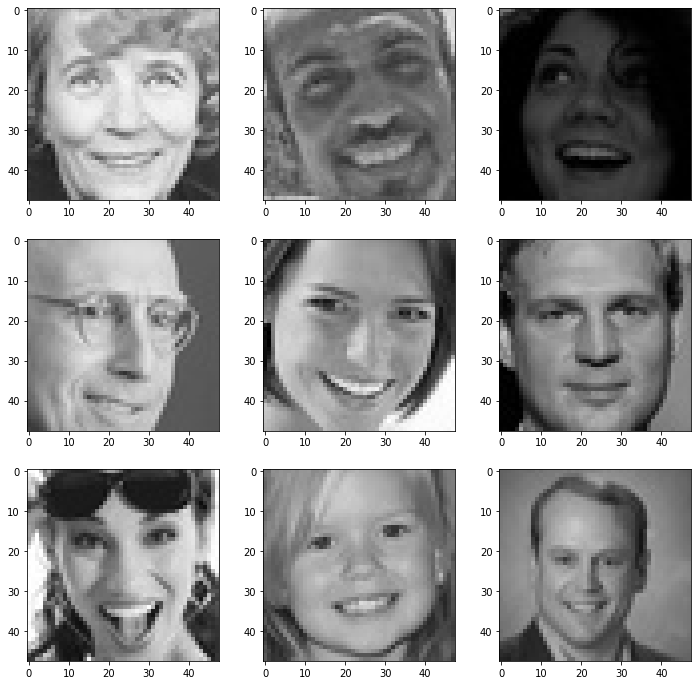

[[255 255 255 ... 116  88  47]
 [255 255 255 ...  51  83  94]
 [255 255 255 ...  62  74  73]
 ...
 [216 224 217 ... 195 194 192]
 [227 222 209 ... 173 176 173]
 [227 210 196 ... 138 136 146]] <class 'numpy.ndarray'>


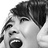

In [8]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(train_folder_path+expression+"/"+os.listdir(train_folder_path+expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()
im = imread("/content/test/fear/PrivateTest_10153550.jpg")
print(im,type(im))
data = ima.fromarray(im)
data

In [9]:
batch_size  = 64


datagen_train  = ImageDataGenerator(rescale=1.0/255.0)
datagen_val = ImageDataGenerator(rescale=1.0/255.0)

train_set = datagen_train.flow_from_directory(train_folder_path,target_size = (picture_size,picture_size),color_mode = "grayscale",batch_size=batch_size,class_mode='categorical',shuffle=True)

#classes=['surprise','happy']
test_set = datagen_val.flow_from_directory(test_folder_path,target_size = (picture_size,picture_size),color_mode = "grayscale",batch_size=batch_size,class_mode='categorical',shuffle=False)
train_folder_path
type(train_set)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


keras.preprocessing.image.DirectoryIterator

In [10]:
dataset = tf.data.Dataset.from_generator(
    lambda: train_set,
    output_types = (tf.float32, tf.float32),
    output_shapes = ([None, 48, 48, 1], [None,7]),
)
#print(dataset)
#print((list(dataset.take(1).as_numpy_iterator())[0][0]).shape)
#dataset.shape


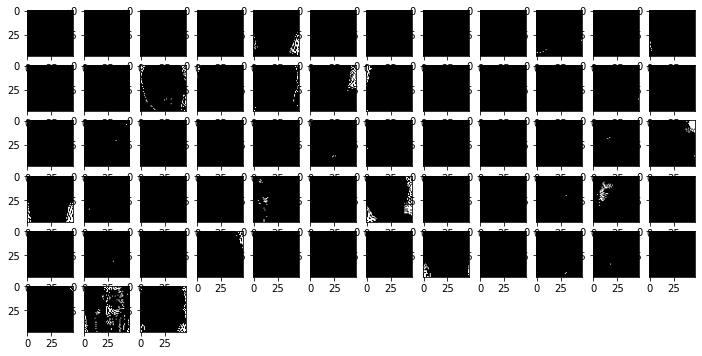

In [11]:
plt.figure(figsize= (12,12))
for i in range(1,64):
    plt.subplot(12,12,i)
    
    x = (list(dataset.take(2).as_numpy_iterator())[0][0][i]).reshape(48,48)
    x = x.astype(np.uint8)#converting float to 0-255
    data = ima.fromarray(x)
    data
    plt.imshow(data,cmap='gray')   
plt.show()


[[255 255 255 ... 116  88  47]
 [255 255 255 ...  51  83  94]
 [255 255 255 ...  62  74  73]
 ...
 [216 224 217 ... 195 194 192]
 [227 222 209 ... 173 176 173]
 [227 210 196 ... 138 136 146]] <class 'numpy.ndarray'>


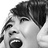

In [12]:

im = imread("/content/test/fear/PrivateTest_10153550.jpg")
print(im,type(im))
data = ima.fromarray(im)
data

In [13]:

from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))    
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))    
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))    
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


opt = Adam(lr = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       7

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
early_stopper = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=6, mode='auto')
checkpointer = ModelCheckpoint('./model.h5', monitor='val_loss', verbose=1, save_best_only=True)


In [20]:
epochs = 100
history = model.fit(train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=epochs,validation_data = test_set,validation_steps = test_set.n//test_set.batch_size,callbacks=[lr_reducer, checkpointer, early_stopper])
#model.fit(train_data,train_labels,epochs = epochs,batch_size = batch_size,validation_split = 0.2,shuffle = True,callbacks=[lr_reducer, checkpointer, early_stopper])

#history = model.fit_generator(generator=train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=epochs,validation_data = test_set,validation_steps = test_set.n//test_set.batch_size,callbacks=callbacks_list)
#model.summary()

Epoch 1/100
448/448 [==============================] - ETA: 0s - loss: 1.8144 - accuracy: 0.2515
Epoch 1: val_loss improved from inf to 1.80501, saving model to ./model.h5
448/448 [==============================] - 31s 69ms/step - loss: 1.8144 - accuracy: 0.2515 - val_loss: 1.8050 - val_accuracy: 0.2483 - lr: 0.0010
Epoch 2/100
448/448 [==============================] - ETA: 0s - loss: 1.8081 - accuracy: 0.2507
Epoch 2: val_loss improved from 1.80501 to 1.80072, saving model to ./model.h5
448/448 [==============================] - 30s 68ms/step - loss: 1.8081 - accuracy: 0.2507 - val_loss: 1.8007 - val_accuracy: 0.2475 - lr: 0.0010
Epoch 3/100
448/448 [==============================] - ETA: 0s - loss: 1.7987 - accuracy: 0.2523
Epoch 3: val_loss improved from 1.80072 to 1.78580, saving model to ./model.h5
448/448 [==============================] - 30s 68ms/step - loss: 1.7987 - accuracy: 0.2523 - val_loss: 1.7858 - val_accuracy: 0.2715 - lr: 0.0010
Epoch 4/100
448/448 [=================

In [22]:
history.history


{'accuracy': [0.25145748257637024,
  0.25068947672843933,
  0.2522604167461395,
  0.2687729001045227,
  0.2857392132282257,
  0.29586315155029297,
  0.31499388813972473,
  0.35276663303375244,
  0.3881305754184723,
  0.409949392080307,
  0.4218188226222992,
  0.4254145622253418,
  0.4353639483451843,
  0.4433583617210388,
  0.4432187080383301,
  0.44608134031295776,
  0.45763659477233887,
  0.47519636154174805,
  0.49450165033340454,
  0.5090242624282837,
  0.5222551822662354,
  0.5376854538917542,
  0.543690025806427,
  0.5556990504264832,
  0.5682318210601807,
  0.5762611031532288,
  0.5854774117469788,
  0.5931575894355774,
  0.6004887223243713,
  0.6134054660797119,
  0.6227613687515259,
  0.6331645846366882,
  0.6445103883743286,
  0.6491534113883972,
  0.658963143825531,
  0.6733461618423462,
  0.6790015697479248,
  0.6906964778900146,
  0.6973294019699097,
  0.7091639041900635,
  0.7152382731437683,
  0.7255716323852539,
  0.7320998311042786,
  0.7368127107620239,
  0.7499389052

In [23]:
new_model = tf.keras.models.load_model('./model.h5')


In [27]:

import cv2
import tensorflow as tf
Categories = ['sad']

def prepare(filepath):
    Img_size = 48
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(Img_size,Img_size))
    new_array=new_array/255.0
    print(new_array)
    return new_array.reshape(-1, Img_size, Img_size, 1)
prediction = new_model.predict([prepare('/content/train/neutral/Training_10133788.jpg')])
print(prediction)


[[0.77647059 0.8        0.47843137 ... 0.36862745 0.23137255 0.16470588]
 [0.74509804 0.82352941 0.37647059 ... 0.27058824 0.35686275 0.3372549 ]
 [0.80784314 0.74117647 0.23137255 ... 0.03529412 0.08627451 0.21960784]
 ...
 [0.55686275 0.48627451 0.46666667 ... 0.13333333 0.1254902  0.12941176]
 [0.52941176 0.4745098  0.42745098 ... 0.13333333 0.1372549  0.15294118]
 [0.50588235 0.41960784 0.4        ... 0.1372549  0.16470588 0.15686275]]
[[8.1889331e-02 4.3954464e-04 7.2076105e-02 2.8514510e-02 6.2224483e-01
  1.8544300e-01 9.3927579e-03]]


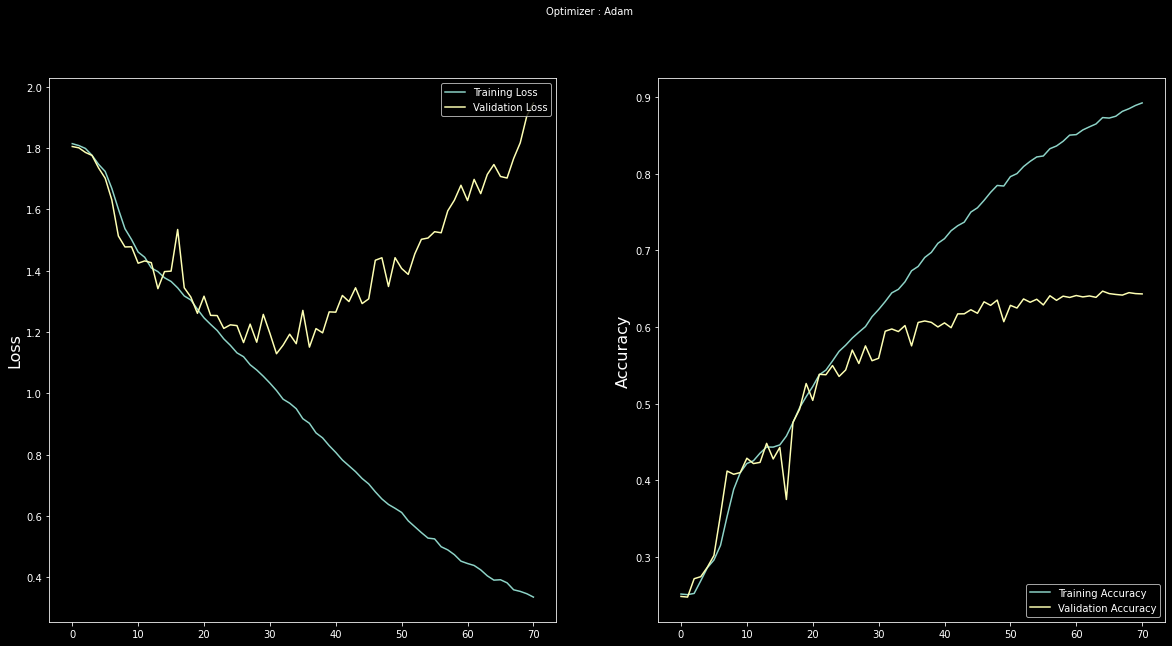

In [28]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [29]:
Y_pred = new_model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
x = confusion_matrix(test_set.classes, y_pred)
a1 = x.sum(axis=1)
a2 = x.diagonal()
print(x)
print(a2)
print(a1)
print(a2/a1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


[[ 407    0  121   56  130  226   18]
 [  83    0   10    2    5   11    0]
 [ 135    0  294   51  172  279   93]
 [  18    0   44 1550   83   42   37]
 [  35    0   64  141  804  183    6]
 [  81    0  109   97  328  614   18]
 [   9    0  126   57   20   19  600]]
[ 407    0  294 1550  804  614  600]
[ 958  111 1024 1774 1233 1247  831]
[0.42484342 0.         0.28710938 0.87373168 0.65206813 0.49238172
 0.72202166]


In [30]:
Y_pred = new_model.predict_generator(train_set)
y_pred = np.argmax(Y_pred, axis=1)
x = confusion_matrix(train_set.classes, y_pred)
a1 = x.sum(axis=1)
a2 = x.diagonal()
print(x)
print(a2)
print(a1)
print(a2/a1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


[[ 491    0  386 1093  799  803  423]
 [  51    0   48  116   90   87   44]
 [ 480    0  374 1114  906  834  389]
 [ 792    0  662 1946 1568 1475  772]
 [ 556    0  473 1359 1033  967  577]
 [ 558    0  464 1328 1037  917  526]
 [ 396    0  265  838  653  673  346]]
[ 491    0  374 1946 1033  917  346]
[3995  436 4097 7215 4965 4830 3171]
[0.12290363 0.         0.09128631 0.26971587 0.20805639 0.18985507
 0.10911384]
